# Linear Transformations - Lab

## Introduction

In this lab, you'll practice your linear transformation skills!

## Objectives

You will be able to:

* Determine if a linear transformation would be useful for a specific model or set of data
* Identify an appropriate linear transformation technique for a specific model or set of data
* Apply linear transformations to independent and dependent variables in linear regression
* Interpret the coefficients of variables that have been transformed using a linear transformation

## Ames Housing Data

Let's look at the Ames Housing data, where each record represents a home sale:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

ames = pd.read_csv('ames.csv', index_col=0)
ames

OSError: 'seaborn-v0_8-darkgrid' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

We'll use this subset of features. These are specifically the _continuous numeric_ variables, which means that we'll hopefully have meaningful mean values.

From the data dictionary (`data_description.txt`):

```
LotArea: Lot size in square feet

MasVnrArea: Masonry veneer area in square feet

TotalBsmtSF: Total square feet of basement area

GrLivArea: Above grade (ground) living area square feet

GarageArea: Size of garage in square feet
```

In [2]:
ames = ames[[
    "LotArea",
    "MasVnrArea",
    "TotalBsmtSF",
    "GrLivArea",
    "GarageArea",
    "SalePrice"
]].copy()
ames

NameError: name 'ames' is not defined

We'll also drop any records with missing values for any of these features:

In [3]:
ames.dropna(inplace=True)
ames

NameError: name 'ames' is not defined

And plot the distributions of the un-transformed variables:

In [4]:
ames.hist(figsize=(15,10), bins="auto");

NameError: name 'ames' is not defined

## Step 1: Build an Initial Linear Regression Model

`SalePrice` should be the target, and all other columns in `ames` should be predictors.

In [5]:
# Your code here - build a linear regression model with un-transformed features
y = ames["SalePrice"]
X = ames.drop("SalePrice", axis=1)
X

NameError: name 'ames' is not defined

In [6]:
import statsmodels.api as sm

initial_model = sm.OLS(y, sm.add_constant(X))
initial_results = initial_model.fit()

print(initial_results.summary())

NameError: name 'y' is not defined

## Step 2: Evaluate Initial Model and Interpret Coefficients

Describe the model performance overall and interpret the meaning of each predictor coefficient. Make sure to refer to the explanations of what each feature means from the data dictionary!

In [7]:
# Your written answer here
The model overall is statistically significant and explains about 68% of the variance in sale price.

The coefficients are all statistically significant.

LotArea: for each additional square foot of lot area, the price increases by about $0.26
MasVnrArea: for each additional square foot of masonry veneer, the price increases by about $55
TotalBsmtSF: for each additional square foot of basement area, the price increases by about $44
GrLivArea: for each additional square foot of above-grade living area, the price increases by about $64
GarageArea: for each additional square foot of garage area, the price increases by about $93


SyntaxError: invalid syntax (<ipython-input-7-a37ed06c8d4d>, line 2)

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The model overall is statistically significant and explains about 68% of the variance in sale price.

The coefficients are all statistically significant.

* `LotArea`: for each additional square foot of lot area, the price increases by about \\$0.26
* `MasVnrArea`: for each additional square foot of masonry veneer, the price increases by about \\$55
* `TotalBsmtSF`: for each additional square foot of basement area, the price increases by about \\$44
* `GrLivArea`: for each additional square foot of above-grade living area, the price increases by about \\$64
* `GarageArea`: for each additional square foot of garage area, the price increases by about \\$93

</details>

## Step 3: Express Model Coefficients in Metric Units

Your stakeholder gets back to you and says this is great, but they are interested in metric units.

Specifically they would like to measure area in square meters rather than square feet.

Report the same coefficients, except using square meters. You can do this by building a new model, or by transforming just the coefficients.

The conversion you can use is **1 square foot = 0.092903 square meters**.

In [8]:
# Your code here - building a new model or transforming coefficients
# from initial model so that they are in square meters
# New model approach
X_metric = X.copy()

# All of the features are measured in square feet, so apply the same transformation
for col in X_metric.columns:
    X_metric[col] = X_metric[col] * 0.092903

# One of the features has "SF" in it which is no longer accurate
X_metric.rename(columns={"TotalBsmtSF": "TotalBsmtArea"}, inplace=True)

X_metric


NameError: name 'X' is not defined

NameError: name 'X' is not defined

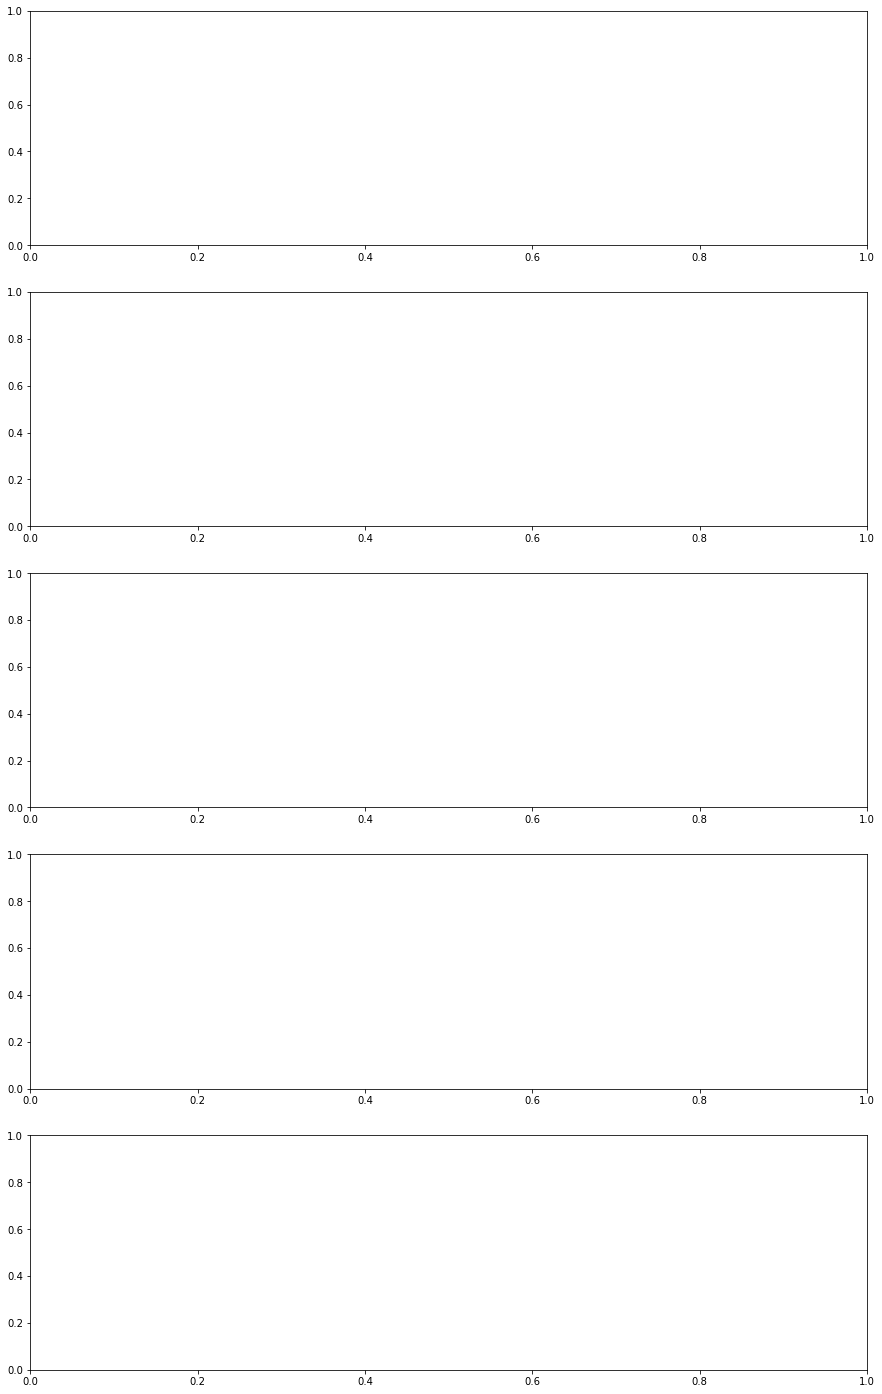

In [9]:
# Your written answer here
fig, axes = plt.subplots(nrows=5, figsize=(15, 25))

for index, col in enumerate(X):
    ax = axes[index]
    ax.hist(X[col], bins="auto", label="Imperial")
    if col == "TotalBsmtSF":
        col = "TotalBsmtArea"
    ax.hist(X_metric[col], bins="auto", label="Metric", color="orange")
    ax.set_xlabel(col)
    ax.legend()

In [10]:
metric_model = sm.OLS(y, sm.add_constant(X_metric))
metric_results = metric_model.fit()

metric_results.params

NameError: name 'y' is not defined

In [11]:
# Transforming initial coefficients approach
# (using [1:] to skip over the intercept)
initial_results.params[1:] / 0.092903

NameError: name 'initial_results' is not defined

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

* `LotArea`: for each additional square meter of lot area, the price increases by about \\$2.76
* `MasVnrArea`: for each additional square meter of masonry veneer, the price increases by about \\$593
* `TotalBsmtArea`: for each additional square meter of basement area, the price increases by about \\$475
* `GrLivArea`: for each additional square meter of above-grade living area, the price increases by about \\$687
* `GarageArea`: for each additional square meter of garage area, the price increases by about \\$1,006

</details>

## Step 4: Center Data to Provide an Interpretable Intercept

Your stakeholder is happy with the metric results, but now they want to know what's happening with the intercept value. Negative \\$17k for a home with zeros across the board...what does that mean?

Center the data so that the mean is 0, fit a new model, and report on the new intercept.

(It doesn't matter whether you use data that was scaled to metric units or not. The intercept should be the same either way.)

In [12]:
# Your code here - center data

X_centered = X_metric.copy()

for col in X_centered.columns:
    X_centered[col] = X_centered[col] - X_centered[col].mean()

X_centered

NameError: name 'X_metric' is not defined

NameError: name 'X_metric' is not defined

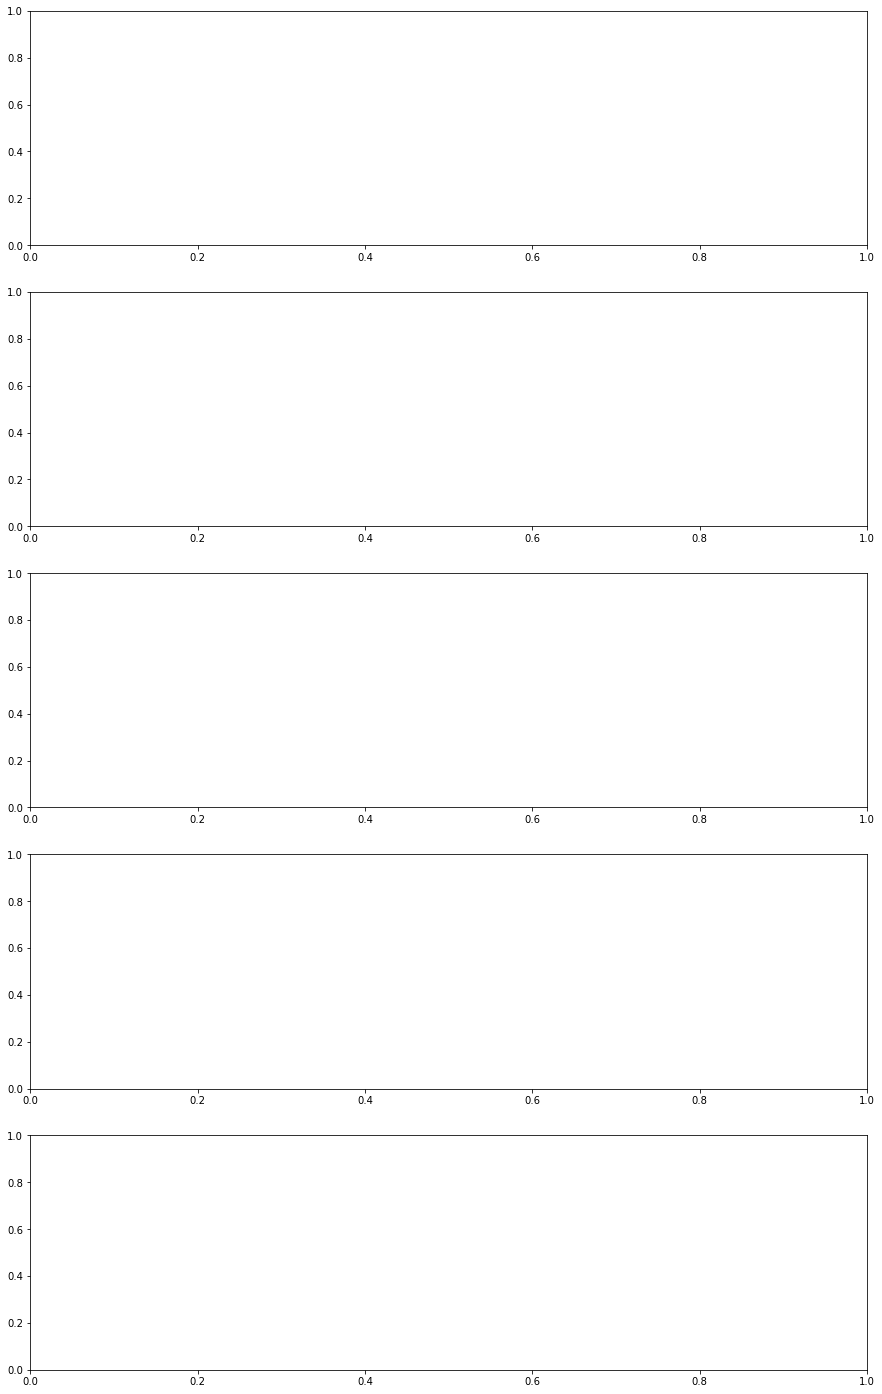

In [13]:
# Your code here - build a new model

fig, axes = plt.subplots(nrows=5, figsize=(15, 25))

for index, col in enumerate(X_metric):
    ax = axes[index]
    ax.hist(X_metric[col], bins="auto", label="Un-Centered")
    ax.hist(X_centered[col], bins="auto", label="Centered", color="orange")
    ax.set_xlabel(col)
    ax.legend()

In [14]:
# Your written answer here - interpret the new intercept

centered_model = sm.OLS(y, sm.add_constant(X_centered))
centered_results = centered_model.fit()

centered_results.params["const"]

NameError: name 'y' is not defined

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The new intercept is about \\$181k. This means that a home with average lot area, average masonry veneer area, average total basement area, average above-grade living area, and average garage area would sell for about \\$181k.

</details>

## Step 5: Identify the "Most Important" Feature

Finally, either build a new model with transformed coefficients or transform the coefficients from the Step 4 model so that the most important feature can be identified.

Even though all of the features are measured in area, they are different kinds of area (e.g. lot area vs. masonry veneer area) that are not directly comparable as-is. So apply **standardization** (dividing predictors by their standard deviations) and identify the feature with the highest standardized coefficient as the "most important".

In [15]:
# Your code here - building a new model or transforming coefficients
# from centered model so that they are in standard deviations
# New model approach
X_standardized = X_centered.copy()

# We have already subtracted the mean, just need to divide by std
for col in X_standardized.columns:
    X_standardized[col] = X_standardized[col] / X_standardized[col].std()

X_standardized


NameError: name 'X_centered' is not defined

NameError: name 'X_standardized' is not defined

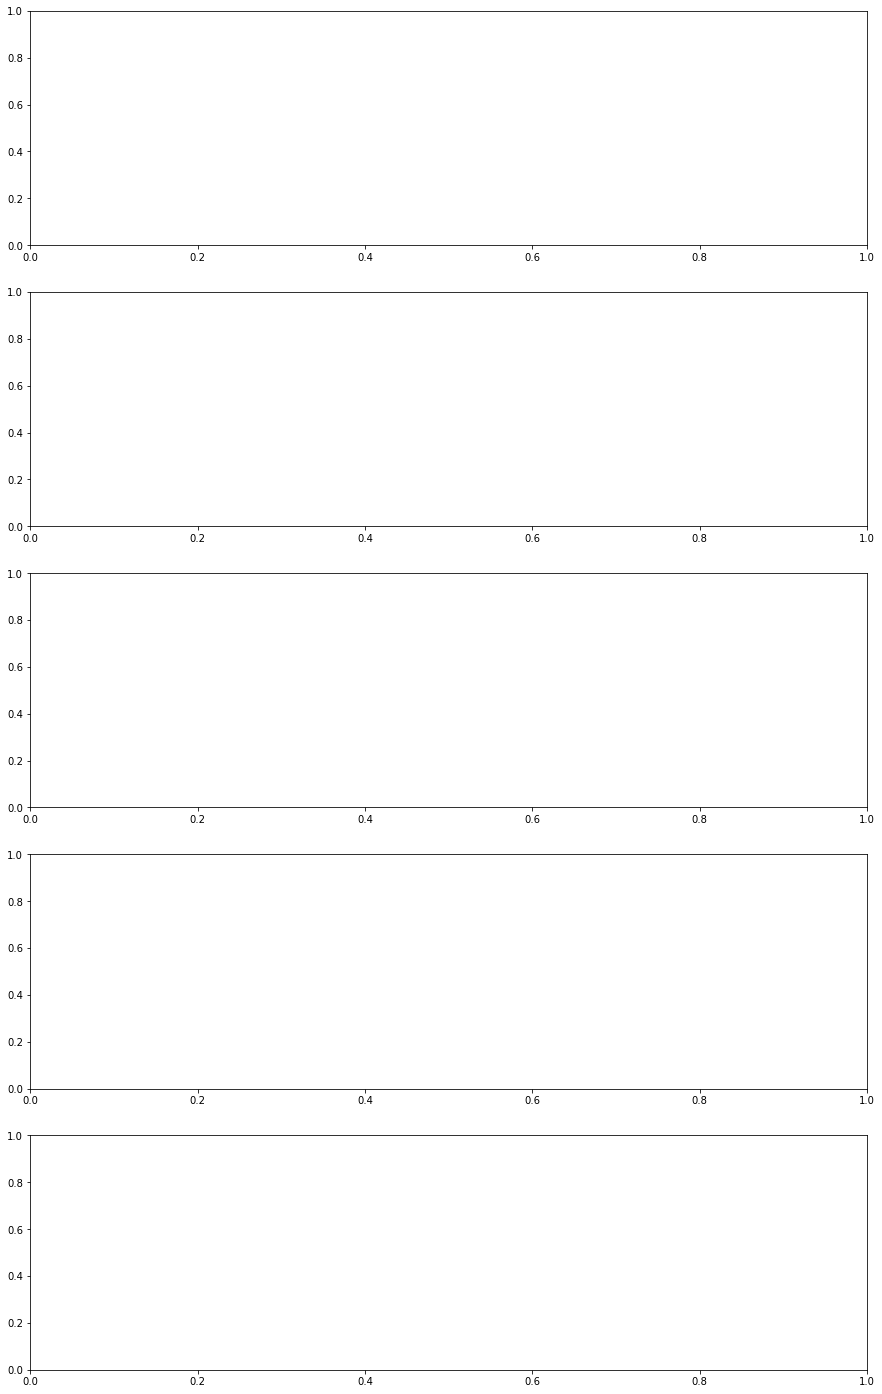

In [16]:
# Your written answer here - identify the "most important" feature

fig, axes = plt.subplots(nrows=5, figsize=(15, 25))

for index, col in enumerate(X_standardized):
    ax = axes[index]
    ax.hist(X_centered[col], bins="auto", label="Centered")
    ax.hist(X_standardized[col], bins="auto", label="Standardized", color="orange")
    ax.set_xlabel(col)
    ax.legend()
    
# Manually adjust LotArea axis because otherwise standardized data is invisible
# (LotArea has a large standard deviation)
axes[0].set_xlim(-500, 500);

In [17]:
standardized_model = sm.OLS(y, sm.add_constant(X_standardized))
standardized_results = standardized_model.fit()

standardized_results.params

NameError: name 'y' is not defined

In [18]:
# Transforming initial coefficients approach
# (using [1:] to skip over the intercept)
for param in centered_results.params.index[1:]:
    transformed_val = centered_results.params[param] * X_centered[param].std()
    print(f"{param:18}{round(transformed_val, 5):>12}")

NameError: name 'centered_results' is not defined

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The feature with the highest standardized coefficient is `GrLivArea`. This means that above-grade living area is most important.

</details>

## Summary
Great! You've now got some hands-on practice transforming data and interpreting the results!